In [ ]:
!kaggle competitions download -c digit-recognizer

# Notebooks created by Francesc Oliveras with [kaggle](http://https://www.kaggle.com/) dataset

[Linkedin](http://www.linkedin.com/in/francesc-oliveras-perez)

[Gihub](https://github.com/fxop0218)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import colorama
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten

import os
# You can write up to 20GB to the  directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
print("Completed")

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
Completed


### Import the dataset
EN
We use pandas to import the csv file
And .head to see a piece of the data

ES
Usamos pandas para importar el archivo csv
Y .head para ver una parte de los datos

In [2]:
train_data = pd.read_csv("../input/digit-recognizer/train.csv")
test_data = pd.read_csv("../input/digit-recognizer/test.csv")

train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


EN
Function that we use later to see the characteristics of the data such as missing values (NaN), all of features and number, records and columns

ES
Función que usamos más tarde para ver las características de los datos, como valores faltantes (NaN), todas las características y el número, registros y columnas.

In [3]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [4]:
data_description(train_data) # Show information of train_data

Data description
Total number of records 42000
number of features 785


         Name   Type  Unique levels  Missing
0       label  int64             10        0
1      pixel0  int64              1        0
2      pixel1  int64              1        0
3      pixel2  int64              1        0
4      pixel3  int64              1        0
..        ...    ...            ...      ...
780  pixel779  int64              3        0
781  pixel780  int64              1        0
782  pixel781  int64              1        0
783  pixel782  int64              1        0
784  pixel783  int64              1        0

[785 rows x 4 columns]


In [5]:
data_description(test_data) # Show information of test_data

Data description
Total number of records 28000
number of features 784


         Name   Type  Unique levels  Missing
0      pixel0  int64              1        0
1      pixel1  int64              1        0
2      pixel2  int64              1        0
3      pixel3  int64              1        0
4      pixel4  int64              1        0
..        ...    ...            ...      ...
779  pixel779  int64              1        0
780  pixel780  int64              1        0
781  pixel781  int64              1        0
782  pixel782  int64              1        0
783  pixel783  int64              1        0

[784 rows x 4 columns]


## Drop label from train values
And set in Y label values

In [6]:
X = train_data.drop("label", axis = 1)
y = train_data["label"]
print("Completed")

Completed


In [7]:
y.value_counts() # Count all values with the same index 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## Let's show information related witn index number

<AxesSubplot:title={'center':'Number of items in each category'}, ylabel='Number (item)'>

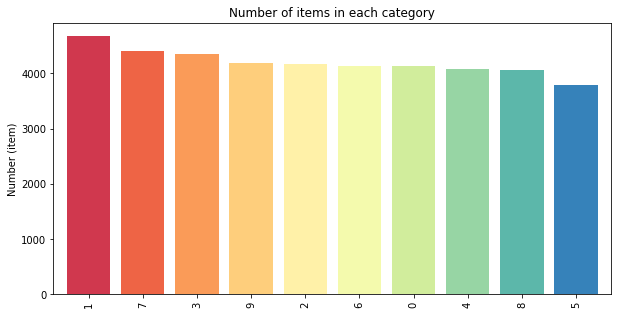

In [8]:
result = y.value_counts()
plt.figure(figsize = (10,5))
plt.title("Number of items in each category")
plt.ylabel("Number (item)")
result.plot.bar(color = sns.color_palette("Spectral",10), width = 0.8)

**EN**
We verify that there is no great difference between the different values ​​that could alter the result of our model.

**ES**
Comprobamos que no existe gran diferencia entre los distintos valores que pudiera alterar el resultado de nuestro modelo.

**EN** Let's check the number of pixels each image has with .shape()
**ES** Comprobemos la cantidad de píxeles que tiene cada imagen con .shape()

In [9]:
X.shape

(42000, 784)

**EN**
The number of pixels per image is 784, to get the width and height, we are going to do the square root
**ES**
El número de píxeles por imagen es 784, para obtener el ancho y el alto, vamos a hacer la raíz cuadrada

In [10]:
w_and_h_value = X.shape[1] ** 0.5 # Do the square root to get the width and height value
print(f'Value to use in (-1, ?, ?, 1) {w_and_h_value}')

Value to use in (-1, ?, ?, 1) 28.0


In [11]:
X = X.values.reshape(-1, 28, 28, 1) # 1 = gray color scale
X_test = test_data.values.reshape(-1,28,28,1)

X.shape, X_test.shape # (Number of values, width, height, gray scale)

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [12]:
X.shape[0] # Number of images

42000

#### Let's show random images

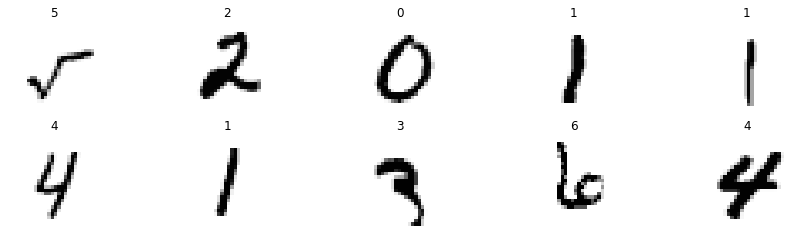

In [13]:
plt.figure(figsize=(15,10)) # setting figure size
for i in range(10): # running loop 10 times to print 10 digit at once
    plt.subplot(5,5,i+1)
    index = np.random.randint(0,42000) # picaing random image from our whole dataset
    plt.imshow(X[index],cmap='Greys') # printing picture in black and white format using cmap
    plt.title(y[index]) # assigning the labeles to the pictures 
    plt.axis(False) # removing x axis and y axis bars from image 


## Add data augmentation
**EN**
To try to get more data to train the model, we modify the original values and make some "fake" values to increase the reliability it offers us.

**ES**
Para intentar sacar más datos para entrenar el modelo modificamos los valores originales y hacemos unos valores "falsos" para aumentar la confianza que nos ofrece.

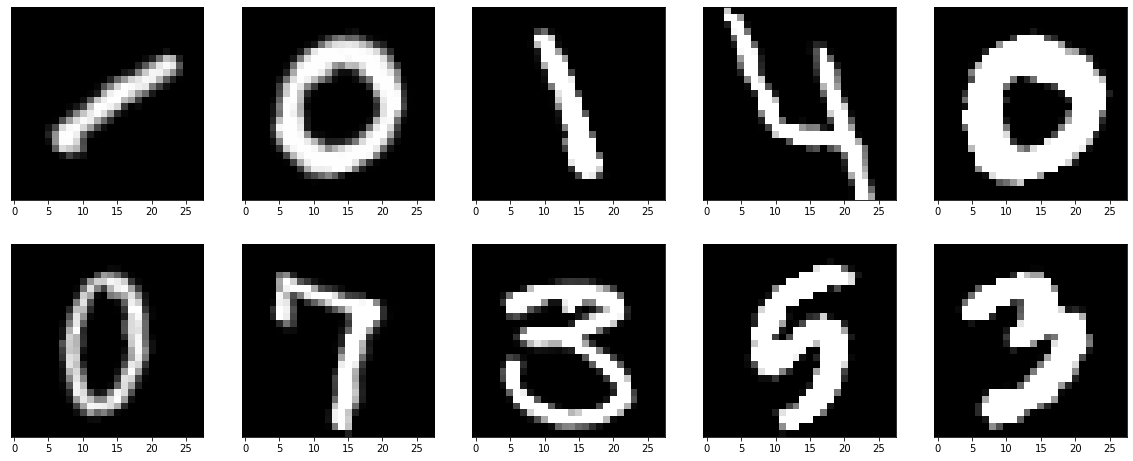

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 20, # maximum level of rotation
    shear_range = 30,# 
    brightness_range=[0, 5],# The range of brightness that the can increase
)

datagen.fit(X) # Get the modified data

# Show the modified data
plt.figure(figsize = (20, 8))
for img, label in datagen.flow(X, y, batch_size = 10, shuffle = False):
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.yticks([])
        plt.imshow(img[i].reshape(28, 28), cmap = "gray")
    break

## Data normalization

**EN**
Transform the data, to have them between values between 0 and 1, this is because the white color has the minimum value (0) and the black color the maximum (255)

**ES**
Transforma los datos, para tenerlos entre valores entre 0 y 1, esto es porque el color blanco tiene el valor mínimo (0) y el negro el máximo (255)

In [15]:
X = X/255
X_test = X_test / 255

**EN**
Convert the y to categorical
num_classes = all categories, in this case (0 to 9) 


**ES**
Convierte la y en categórica
num_classes = todas las categorías en este caso (0 a 9)

In [16]:
y = to_categorical(y, num_classes = 10)

**EN**
Get training and validation data

**ES**
Obtiene los datos de entrenamiento y validación

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)

## Create the model

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape=(28,28,1)), # input_shape = dimension of the image and color
    tf.keras.layers.MaxPooling2D(2,2), # Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window
    tf.keras.layers.Dropout(0.2), # Drop a percent of neurons
    
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(), # eshaping it into a one-dimensional tensor.
    
    tf.keras.layers.Dense(125, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"), # Output neuron
])

2022-08-10 16:42:44.209689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 16:42:44.301496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 16:42:44.302249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 16:42:44.303372: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

## Compile the model

In [19]:
model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

## Fit the model

In [20]:
data_gen_training = datagen.flow(X_train, y_train, batch_size = 28)

In [21]:
history = model.fit(data_gen_training,
             validation_data = (X_val, y_val),
             epochs = 75, batch_size = 32, # Epochs number of times to repet the proces
             )

2022-08-10 16:42:46.992614: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/75


2022-08-10 16:42:48.497388: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1050/1050 [==============================] - 24s 16ms/step - loss: 1.0475 - accuracy: 0.7338 - val_loss: 2.2434 - val_accuracy: 0.1102
Epoch 2/75
1050/1050 [==============================] - 15s 14ms/step - loss: 0.4259 - accuracy: 0.8851 - val_loss: 2.3226 - val_accuracy: 0.1437
Epoch 3/75
1050/1050 [==============================] - 16s 15ms/step - loss: 0.3263 - accuracy: 0.9097 - val_loss: 2.2059 - val_accuracy: 0.1623
Epoch 4/75
1050/1050 [==============================] - 15s 14ms/step - loss: 0.2831 - accuracy: 0.9222 - val_loss: 2.1007 - val_accuracy: 0.2510
Epoch 5/75
1050/1050 [==============================] - 16s 15ms/step - loss: 0.2439 - accuracy: 0.9299 - val_loss: 2.0473 - val_accuracy: 0.3562
Epoch 6/75
1050/1050 [==============================] - 14s 14ms/step - loss: 0.2271 - accuracy: 0.9338 - val_loss: 1.8128 - val_accuracy: 0.3583
Epoch 7/75
1050/1050 [==============================] - 14s 14ms/step - loss: 0.2076 - accuracy: 0.9395 - val_loss: 1.5578 - val_accura

<AxesSubplot:>

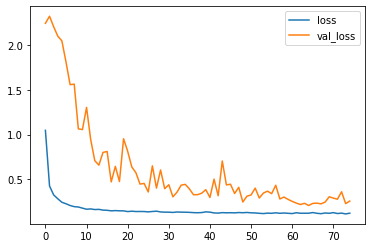

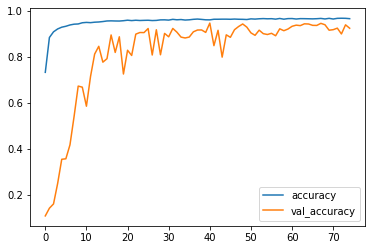

In [22]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

2022-08-10 17:32:50.997124: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-08-10 17:32:51.919213: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 17:32:51.919615: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-08-10 17:32:51.919765: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-08-10 17:32:51.920183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 17:32:51.920647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had ne

In [25]:
pred = model.predict(X_test)
pred = tf.math.argmax(pred, axis = -1)
pred = pd.Series(pred, name='Label')
image_id = pd.Series(range(1,28001),name='ImageId')
image_id.isnull().sum()

pred = pd.concat([image_id,pred],axis=1)
pred.to_csv('submission.csv',index=False)